In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error

In [2]:
df = pd.read_csv('ml_data.csv')

In [3]:
df.head()

,type_of_property,price,building_condition,facade_number,living_area,equipped_kitchen,terrace,garden,subtype_ecoded,km_to_capital
0,0,149000.0,2,2.0,48,1,9,0,7,3.33
1,0,248000.0,2,2.0,91,1,2,0,7,3.91
2,0,229000.0,2,2.0,100,0,26,0,7,6.62
3,0,470000.0,2,2.0,179,2,10,0,7,5.29
4,0,480000.0,2,2.0,116,1,7,0,7,1.07


In [4]:
# Select the columns to be used   # 
features = ['type_of_property', 'building_condition', 'facade_number',
       'living_area', 'equipped_kitchen', 'terrace', 'garden',
       'subtype_ecoded', 'km_to_capital']

In [5]:
# Apply logarithm to the target col, so larger values are more compressed than small ones,
# making it easier for the model to handle outliers
df['price'] = np.log1p(df['price'])

In [6]:
# Split the data in features and target columns
X = df[features].values
y = df['price'].values.reshape(-1,1)

In [7]:
# Normalize the data
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y) 

In [8]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Build model
model = Sequential()
model.add(Dense(128, input_shape=(len(features),), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1)) # output layer

# Set an optimizer
optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

c:\Users\celin\OneDrive\Desktop\Bootcamp\mlenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#Train the model  
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=30, verbose=1, mode='auto', restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test[:1000], y_test[:1000]), callbacks=[monitor], shuffle=False, epochs=50, batch_size=32)

Epoch 1/50
478/478 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6229 - mae: 0.5668 - val_loss: 0.4397 - val_mae: 0.4759
Epoch 2/50
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5049 - mae: 0.5109 - val_loss: 0.4083 - val_mae: 0.4564
Epoch 3/50
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4772 - mae: 0.4967 - val_loss: 0.4206 - val_mae: 0.4627
Epoch 4/50
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4726 - mae: 0.4934 - val_loss: 0.4029 - val_mae: 0.4514
Epoch 5/50
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4692 - mae: 0.4901 - val_loss: 0.3970 - val_mae: 0.4479
Epoch 6/50
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4579 - mae: 0.4844 - val_loss: 0.4065 - val_mae: 0.4517
Epoch 7/50
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4582 - mae: 0.4844 - val_loss: 0.3888 - val_mae: 0.4439
Epoch 8/50
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4516 - mae: 0.4788 - val_loss: 0.3893 - val_mae: 0.4446
Epoch 9/50
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

In [11]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


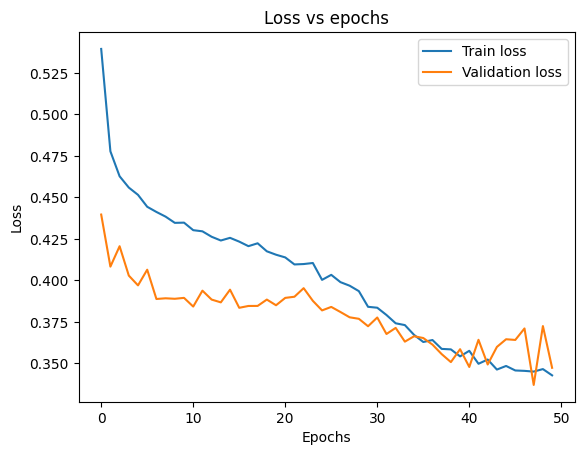

In [19]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss vs epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [13]:
# Make predictions
X_test1 = X_test[100:200]
y_test1 = y_test[100:200]

predictions = model.predict(X_test1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [14]:
# Convert predictions back to euros

# reverse the scaled data:
predictions_log = scaler_y.inverse_transform(predictions)

# reverse the logarith applied to target (price)
predictions_actual = np.expm1(predictions_log)

In [15]:
# Same process for the actual values of the price col
y_test1_log = scaler_y.inverse_transform(y_test1)
y_test_actual = np.expm1(y_test1_log)

In [16]:
# Make df for better interpretation
predictions_actual = pd.DataFrame(predictions_actual)
price_actual = pd.DataFrame(y_test_actual)

compare_df = pd.concat([predictions_actual, price_actual], axis = 1)
column_names = ['predictions', 'actual_price']
compare_df.columns = column_names

#compare_df['difference'] = compare_df.apply('predictions' - 'actual_price')

compare_df

,predictions,actual_price
0,338237.437500,345000.0
1,386753.093750,511500.0
2,290344.500000,345000.0
3,549910.750000,434000.0
4,428191.468750,370000.0
...,...,...
95,266471.093750,170000.0
96,263892.312500,253000.0
97,383206.468750,1250000.0
98,459978.218750,375000.0


In [17]:
#mse = mean_squared_error(y_test_normal, predictions_actual)
rmse = root_mean_squared_error(y_test_actual, predictions_actual)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 197465.57611960368


In [18]:
mape = np.mean(np.abs((y_test_actual - predictions_actual) / y_test_actual) * 100)
mape = round(mape, 2)
print(f"Mean Absolute Percentage Error (MAPE): {mape} %")

Mean Absolute Percentage Error (MAPE): 21.55 %
